In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/50startup/50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.State.value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
OH = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

In [12]:
Encoded=OH.fit_transform(df[['State']])

In [32]:
Encoded_df=pd.DataFrame(Encoded, columns =['New York','California','Florida'] )
df = df.join(Encoded_df)

In [33]:
df = df.drop('State', axis = 1)

In [26]:
Encoded_df.head()

,New York,California,Florida
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [34]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,New York,California,Florida
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


In [35]:
corr=df.corr()

<Axes: >

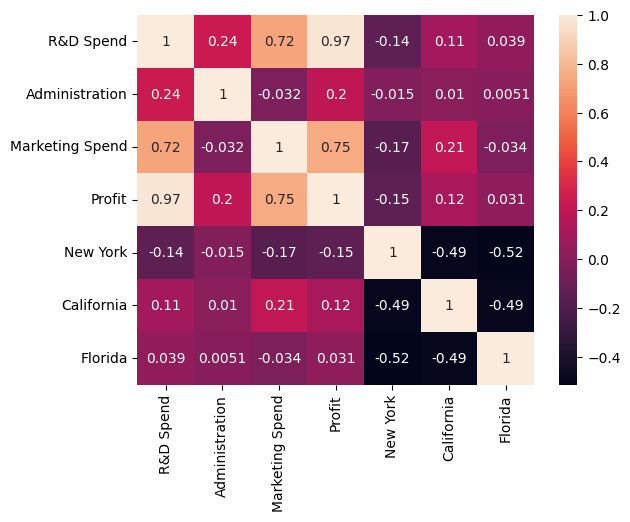

In [36]:
sns.heatmap(corr, annot = True)

In [38]:
df=df.drop(columns = ['New York', 'California', 'Florida'], axis = 1)

In [39]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


<Axes: >

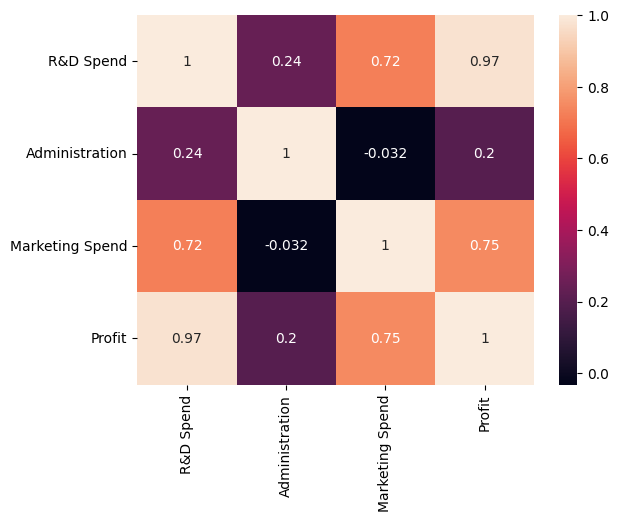

In [40]:
corr=df.corr()
sns.heatmap(corr, annot = True)

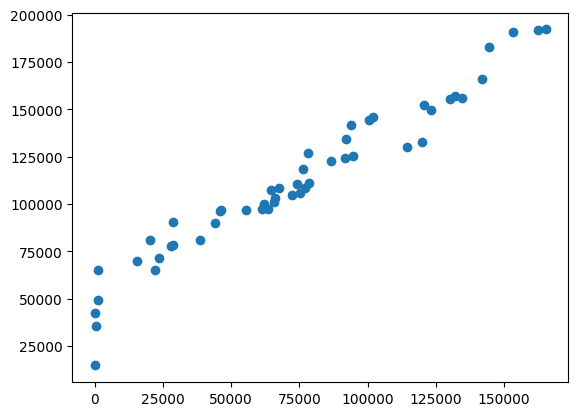

In [41]:
plt.scatter(df['R&D Spend'],df['Profit'])

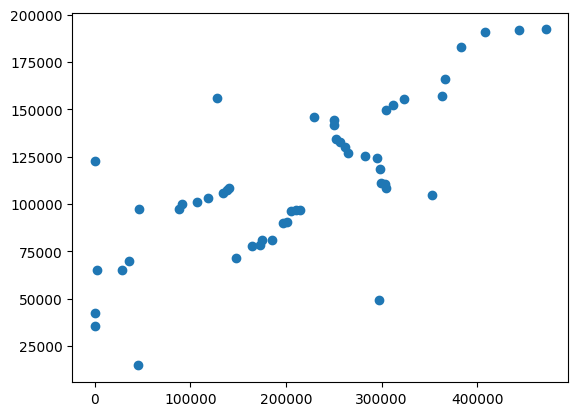

In [44]:
plt.scatter(df['Marketing Spend'],df['Profit'])

In [81]:
X=df.drop(columns=['Profit','Administration'],axis=1)
y=df['Profit']

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
model=LinearRegression()

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()

In [88]:
X_train =pd.DataFrame(scaler.fit_transform(X_train) , columns=['R&D Spend', 'Marketing Spend'])

In [89]:
X_test =pd.DataFrame(scaler.transform(X_test) , columns=['R&D Spend', 'Marketing Spend'])

In [64]:
print(list(df.columns))

['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']


In [75]:
X_train.head()

,R&D Spend,Marketing Spend
12,93863.75,249839.44
4,142107.34,366168.42
37,44069.95,197029.42
8,120542.52,311613.29
3,144372.41,383199.62


In [90]:
model.fit(X_train, y_train)

LinearRegression()

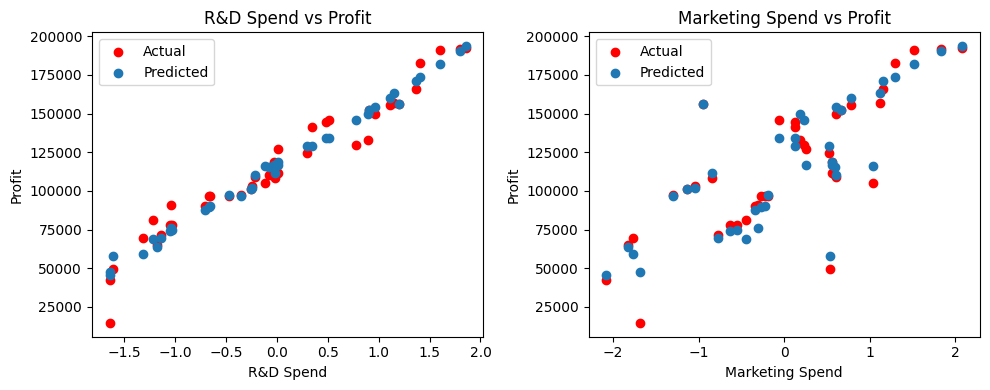

In [100]:
plt.figure(figsize=(10, 4))


plt.subplot(1, 2, 1)
plt.scatter(X_train['R&D Spend'], y_train, color='red', label='Actual')
plt.scatter(X_train['R&D Spend'], model.predict(X_train), label='Predicted')
plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(X_train['Marketing Spend'], y_train, color='red', label='Actual')
plt.scatter(X_train['Marketing Spend'], model.predict(X_train), label='Predicted')
plt.title('Marketing Spend vs Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.legend()

plt.tight_layout()
plt.show()

In [101]:
y_pred=model.predict(X_test)

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [103]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

67343832.58979617
6469.181721468596
8206.32881316586


In [106]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


R² Score: 0.9168381183550246
Mean Squared Error: 67343832.58979617
Mean Absolute Error: 6469.181721468596
